# Credit Risk Analysis 
*** Using Logistic Regression and Ensemble Learning to Predict Credit Risk ***
#### by Justin R. Papreck
---

## Overview

Analyzing credit risk is a difficult task, as there are a plethora of factors that can impact credit risk compounded with the fact that the number of good loans far outnumbers the number of risky loans, providing a very unbalanced dataset. Using different techniques in machine learning, this project attempts to find the best predictive method to determine which characteristics have the greatest correlation with high-risk loans to allow a lending company to better assess potential borrowers. The methods applied in this report are logistic regression with oversampling, undersampling, combinatorial sampling, random forests and bag of boosters. 

---
## Methods
*** Logistic Regression with Different Sampling Applications ***

### Oversampling
---

Two oversampling algorithms were used to determine which performed better: a naive random oversampling algorithm and the SMOTE algorithm (Synthetic Minority Oversampling Technique). The naive random sampling was performed using RandomOverSampler from imbalanced-learn to resample the data, and the scikit-learn LogisticRegression model was used to fit the training data. For all logistic regressions, the solver used was the 'lbfgs' solver (default). A random state of 1

The data were analyzed using the balanced accuracy score and imbalanced classification score. (Data cleaning is shown in Index)

#### Naive Random Oversampling
---

Random oversampling takes the minority class, in this case the high-risk loans, and randomly selects records from the minority data and adds them to the training set until the majority and minority classes are balanced. 

The Balanced Accuracy Score is 65.44%


<Figure size 432x360 with 0 Axes>

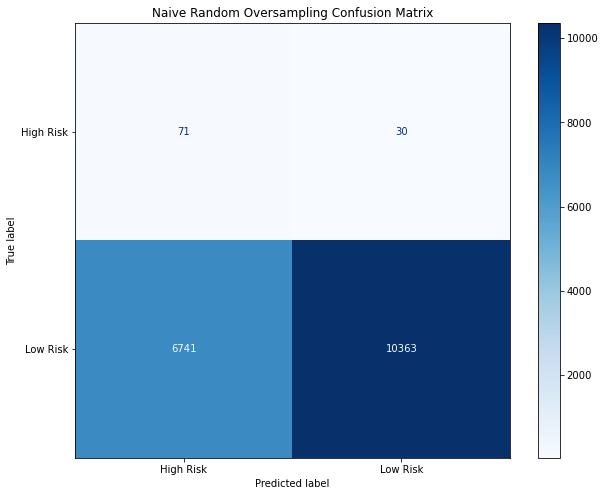

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.70      0.61      0.02      0.65      0.43       101
   low_risk       1.00      0.61      0.70      0.75      0.65      0.42     17104

avg / total       0.99      0.61      0.70      0.75      0.65      0.42     17205



In [41]:
# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

# Traininng the model
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# Calculated the balanced accuracy score
print(f"The Balanced Accuracy Score is {balanced_accuracy_score(y_test, y_pred)*100:,.2f}%")

# print(confusion_matrix(y_test, y_pred))
# Display confusion matrix
plt.figure(figsize=(6, 5))
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=["High Risk", "Low Risk"], cmap='Blues', values_format='d')
plt.title('Naive Random Oversampling Confusion Matrix')
plt.show()

# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))




#### SMOTE Oversampling
---

SMOTE oversampling is intended to improve random oversampling by creating synthetic data points based on the original data points. It also sounds very impressive when you refer to it as the Synthetic Minority Oversampling TEchnique to people unfamiliar with it. This process uses a nearest-neighbors approach to interpolate the new data points, potentially improving accuracy. One drawback to this method is the vulnerability to outliers - as this process may create new data points near existing extreme outliers.  

The Balanced Accuracy Score is 65.81%


<Figure size 432x360 with 0 Axes>

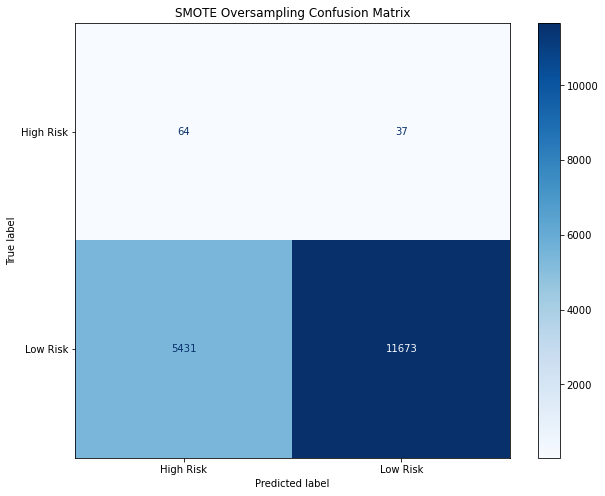

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.63      0.68      0.02      0.66      0.43       101
   low_risk       1.00      0.68      0.63      0.81      0.66      0.43     17104

avg / total       0.99      0.68      0.63      0.81      0.66      0.43     17205



In [42]:
# SMOTE Resampling of the training data
X_resampled, y_resampled = SMOTE(
    random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)
Counter(y_resampled)

# Logistic Regression of the SMOTE resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# Calculated the balanced accuracy score
print(
    f"The Balanced Accuracy Score is {balanced_accuracy_score(y_test, y_pred)*100:,.2f}%")

# print(confusion_matrix(y_test, y_pred))
# Display confusion matrix
plt.figure(figsize=(6, 5))
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=[
                            "High Risk", "Low Risk"], cmap='Blues', values_format='d')
plt.title('SMOTE Oversampling Confusion Matrix')
plt.show()


# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

### Undersampling
---

The process of oversampling amplified the minority to meet the size of the majority group. Undersampling does the opposite and curtails the size of the majority group to that of the size of the minority group. While this maintains the fidelity of the data by only using existing data, it is only very applicable if there is enough data in the minority set to work with. In very small datasets, too much of the majority set will be lost to make accurate predictions. Similar to the oversampling, there are different undersampling algorithms, including random sampling. In this case, a Cluster Centroid Undersampling technique was used, again intended to improve upon the inaccuracies of random sampling. This algorithm identifies cluseters of the majority class and generates synthetic data points, as did SMOTE, but in this case as an extrapolation of multiple existing data points to interpolate as a representative of the cluster. This allows the majority class to be sampled down to the size of the minority class. 

The Balanced Accuracy Score is 52.83%


<Figure size 432x360 with 0 Axes>

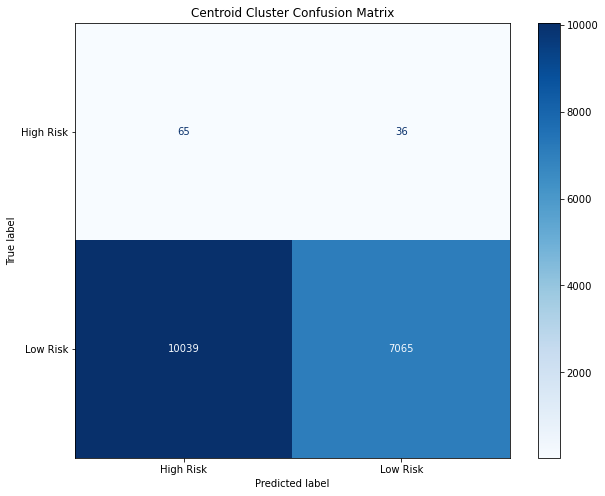

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.64      0.41      0.01      0.52      0.27       101
   low_risk       0.99      0.41      0.64      0.58      0.52      0.26     17104

avg / total       0.99      0.41      0.64      0.58      0.52      0.26     17205



In [43]:
# ClusterCentroid resampling of the training data 
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# Calculated the balanced accuracy score
print(
    f"The Balanced Accuracy Score is {balanced_accuracy_score(y_test, y_pred)*100:,.2f}%")

# print(confusion_matrix(y_test, y_pred))
# Display confusion matrix
plt.figure(figsize=(6, 5))
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=[
                            "High Risk", "Low Risk"], cmap='Blues', values_format='d')
plt.title('Centroid Cluster Confusion Matrix')
plt.show()


# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))


### Combination Sampling
---

The SMOTEENN algorithm applies a combination of both undersampling and oversampling. SMOTEEN uses SMOTE and Edited Nearest Neighbors (ENN) as a two-step process, starting with the oversampling of the minority class with SMOTE and cleaning the resulting data by undersampling - if the two nearest neighbors of a data point belong to two different classes, the point is dropped. 

The Balanced Accuracy Score is 64.74%


<Figure size 432x360 with 0 Axes>

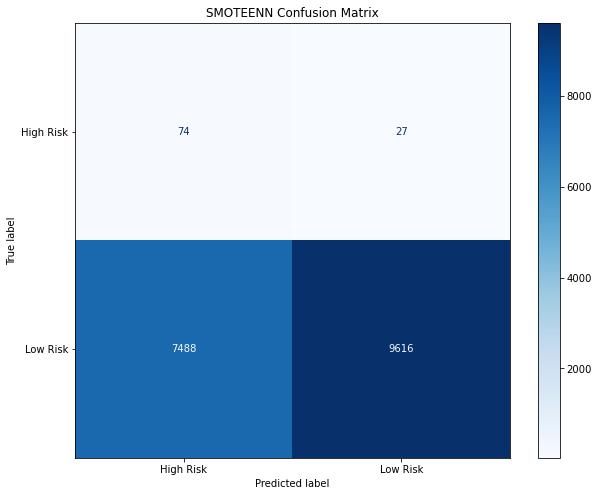

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.73      0.56      0.02      0.64      0.42       101
   low_risk       1.00      0.56      0.73      0.72      0.64      0.40     17104

avg / total       0.99      0.56      0.73      0.71      0.64      0.40     17205



In [44]:
# SMOTEENN resampling of the training data
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# Calculated the balanced accuracy score
print(
    f"The Balanced Accuracy Score is {balanced_accuracy_score(y_test, y_pred)*100:,.2f}%")

# print(confusion_matrix(y_test, y_pred))
# Display confusion matrix
plt.figure(figsize=(6, 5))
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=[
                            "High Risk", "Low Risk"], cmap='Blues', values_format='d')
plt.title('SMOTEENN Confusion Matrix')
plt.show()


# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))


## *** Ensemble Learning with Random Forests and Boosting ***
---

### Balanced Random Forest Classifier
--- 

The Balanced Random Forest Classifier is a modification of the Random Forest Classifier. Random Forest Classification uses an ensemble of decision tree models to classify outcomes. While the individual decision trees may provide poor outcomes, the assembly of many of these trees into a 'forest' can accumulate the predictions from these weak learners to provide a collection of decision trees with controlled variance to generate reasonable predictions across a wide range of data, and thus this allows for the better predictions. Unfortunately, while the standard random forest algorithm can make good predictions even on imbalanced data, it has difficulty making predictions on extremely unbalanced data, since the probability of the decision trees even containing a predictor of the minority category is extremely low. 

The Balanced Random Forest Classifier uses undersampling of the majority class in each bootstrap sample to change the class distribution. This alleviates the issue of having such extreme unbalanced data, which is seen with the high-risk loans. This also lets us look at the features from the dataset and rank them in order of feature importance in the decision trees. 


The Balanced Accuracy Score is 74.12%


<Figure size 432x360 with 0 Axes>

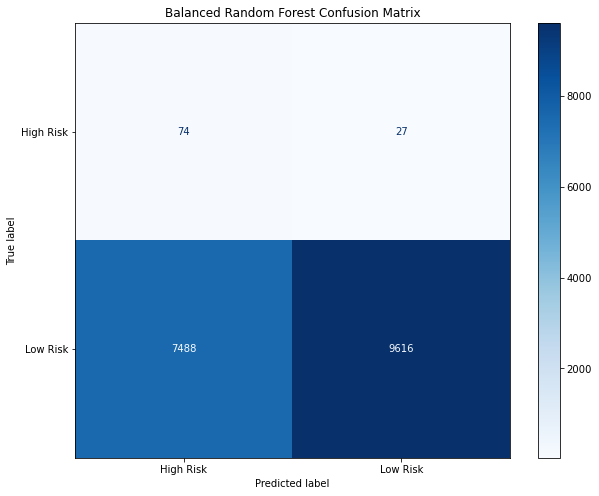

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.61      0.87      0.05      0.73      0.52       101
   low_risk       1.00      0.87      0.61      0.93      0.73      0.55     17104

avg / total       0.99      0.87      0.62      0.92      0.73      0.55     17205



[(0.08230994769510414, 'total_rec_prncp'),
 (0.07056965445399586, 'last_pymnt_amnt'),
 (0.06697574557210484, 'total_rec_int'),
 (0.0477260885777328, 'total_pymnt'),
 (0.04670837607659922, 'total_pymnt_inv'),
 (0.033015591804214164, 'issue_d'),
 (0.032811236582933494, 'int_rate'),
 (0.020352914833844552, 'mths_since_recent_inq'),
 (0.01878397328527505, 'avg_cur_bal'),
 (0.017975815460573304, 'out_prncp_inv'),
 (0.016145477977071974, 'tot_hi_cred_lim'),
 (0.016068713178803082, 'all_util'),
 (0.01584726050311816, 'out_prncp'),
 (0.01579798002260119, 'dti'),
 (0.0157533477018616, 'revol_bal'),
 (0.014690497594271377, 'mths_since_rcnt_il'),
 (0.014419789614312933, 'bc_open_to_buy'),
 (0.014325214246275421, 'installment'),
 (0.013896430363045737, 'mo_sin_old_rev_tl_op'),
 (0.013810675218325463, 'total_bc_limit'),
 (0.013666604450997676, 'total_rev_hi_lim'),
 (0.01366221345876921, 'tot_cur_bal'),
 (0.01336127669303002, 'annual_inc'),
 (0.013274027815055357, 'max_bal_bc'),
 (0.0128776729463111

In [45]:
# Create the Balanced Random Forest Classifier and train the model
barf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
barf.fit(X_train, y_train)
y_pred = barf.predict(X_test)

# Calculated the balanced accuracy score
print(
    f"The Balanced Accuracy Score is {balanced_accuracy_score(y_test, y_pred)*100:,.2f}%")

# print(confusion_matrix(y_test, y_pred))
# Display confusion matrix
plt.figure(figsize=(6, 5))
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=[
                            "High Risk", "Low Risk"], cmap='Blues', values_format='d')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()


# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

# List the features sorted in descending order by feature importance
sorted(zip(barf.feature_importances_,X.columns), reverse=True)

### Easy Ensemble AdaBoost Classifier
--- 

The Easy Ensemble Classifier creates balanced samples of the training data by collecting all of the data from the minority set and creates a random subset of equal size from the majority set, a process known as random undersampling. It then uses the AdaBoost algorithm to correct for errors made in each subsequent dataset, paying more attention to misclassified and less attention to correctly classified records. A new tree is added on the weighted dataset to correct the errors.

Similar to the Balanced Random Forests, the random undersampling of the Easy Ensemble allows for more accurate predictions in extremely unbalanced data.  

The Balanced Accuracy Score is 93.21%


<Figure size 432x360 with 0 Axes>

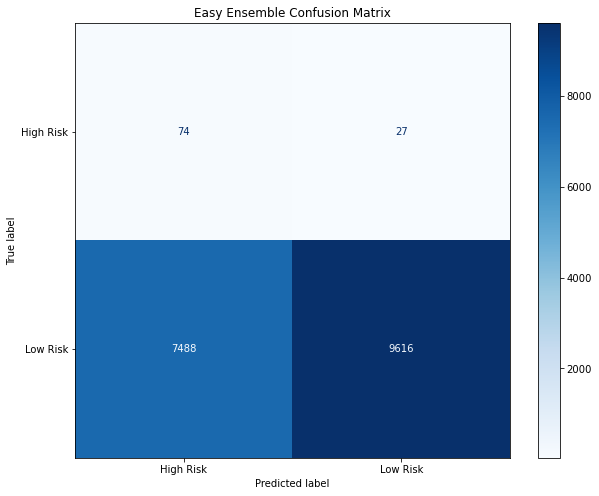

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.09      0.92      0.94      0.16      0.93      0.87       101
   low_risk       1.00      0.94      0.92      0.97      0.93      0.87     17104

avg / total       0.99      0.94      0.92      0.97      0.93      0.87     17205



In [46]:
# Create the Easy Ensemble Classifier and train the model
easy_e = EasyEnsembleClassifier(n_estimators=100, random_state=1)
easy_e.fit(X_train, y_train)
y_pred = easy_e.predict(X_test)

# Calculated the balanced accuracy score
print(
    f"The Balanced Accuracy Score is {balanced_accuracy_score(y_test, y_pred)*100:,.2f}%")

# print(confusion_matrix(y_test, y_pred))
# Display confusion matrix
plt.figure(figsize=(6, 5))
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=[
                            "High Risk", "Low Risk"], cmap='Blues', values_format='d')
plt.title('Easy Ensemble Confusion Matrix')
plt.show()


# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

## Results
---



## Appendix - Data Cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Dependencies and Data Cleaning
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In cleaning the data, several of the columns were removed that were not relevant to this analysis, such as id information and job title. Additionally, other aspects needed to be cleaned, such as the % symbol present in the interest rate field, and changing the Late/Default/Grace Period borrowers into a single high-risk category. There were still 10 non-numerical data types, which would make it difficult to do categorization. All of the months were changed to their numerical form using a dictionary. The other categories were changed using pd.get_dummies(). 

In [15]:
# Data Cleaning
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]
target = ["loan_status"]

# Load the data
file_path = Path('LoanStats_2019Q1.csv')
df = pd.read_csv(file_path, skiprows=1)[:-2]
df = df.loc[:, columns].copy()

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

# Remove the `Issued` loan status
issued_mask = df['loan_status'] != 'Issued'
df = df.loc[issued_mask]

# convert interest rate to numerical
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float') / 100

# Convert the target column values to low_risk and high_risk based on their values
x = {'Current': 'low_risk'}
df = df.replace(x)

x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)',
                  'Default', 'In Grace Period'], 'high_risk')
df = df.replace(x)

df.reset_index(inplace=True, drop=True)
df.head()

# Determine the non-numerical Data types, which will need to be changed
df.select_dtypes(exclude='number').head(4)
# np.unique(df.loan_status)

# Encode the data from string objects to meaningful numerical forms
df_encoded = pd.get_dummies(df, columns=['home_ownership', 'verification_status', 'pymnt_plan',
                            'initial_list_status', 'application_type', 'hardship_flag', 'debt_settlement_flag'])

# loan_status_num = {
#     'low_risk': 0,
#     'high_risk': 1
# }

# df_encoded['loan_status'] = df_encoded['loan_status'].apply(lambda x: loan_status_num[x])

# Months dictionary
months_num = {
    "Jan-2019": 1,
    "Feb-2019": 2,
    "Mar-2019": 3,
    "Apr-2019": 4,
    "May-2019": 5
}

# Change the months of issue and next payment to a number corresponding to the month, rather than the string format
df_encoded["issue_d"] = df_encoded["issue_d"].apply(lambda x: months_num[x])
df_encoded["next_pymnt_d"] = df_encoded["next_pymnt_d"].apply(
    lambda x: months_num[x])

# Just verifying that all data has been encoded
# df_encoded.select_dtypes(exclude='number').head()


In [18]:
# Split Data into Training and Testing
# Create our features
X = df_encoded.copy()
X = X.drop(target, axis=1)

# Create our target
y = df_encoded[target]

X.describe()

# Check the balance of our target values
y['loan_status'].value_counts()


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)